In [1]:
import backtest_tools.portfolio_tools as backtest
import pandas as pd
import numpy as np

In [2]:
import pickle

In [3]:
tickers = ['FTAI', 'AMT', 'NEE', 'TDOC', 'INTC', 'FISV', 'DAL', 'ISRG', 'GOOS', 'TXN', 'TSM', 'MHK', 'ACLS', 'EPD', 'PLYM', 'ED']

path = r'C:\Users\marcu\Documents\Quant\Programming\Data\russell_300_returns.pickle'

with open(path, 'rb') as reader:
    returns = pickle.load(reader)

tickers = returns.columns.intersection(tickers)
returns = returns[tickers]

Use Quadratic Optimization MVO

In [7]:
expected_returns = returns.mean()
hist_returns = returns

mvo_weights = backtest.mvo(hist_returns=hist_returns, expected_returns=expected_returns, constrained=False, vol_target_boolean=False)
mvo_weights
# mvo_weights = backtest.mvo(hist_returns=hist_returns, expected_returns=expected_returns, constrained=False)

Target Vol: 
0.031832289220063016
Long-Short Ratio: 2.5190135351087233
Leverage: 4.869711218677278
Sum of Vol Weights: 2.1021
Target Portfolio Sharpe Ratio: 1.0791949182771148


TXN     1.028517
NEE     0.595219
INTC   -1.020135
AMT     0.116278
ISRG    0.132857
FISV    0.409401
ED      0.466677
DAL     0.212741
MHK    -0.363694
TDOC    0.189084
ACLS    0.184416
PLYM    0.150694
dtype: float64

Sharpe Ratio                   1.058707
Drift Adjusted Sharpe Ratio    0.072739
CAGR                           0.476454
Vol                            0.474840
Sortino Ratio                  1.495613
Martin (Ulcer) Ratio           0.001898
Omega Ratio                    1.178382
RR Ratio                       1.208826
Win Rate                       0.537027
Skew                           0.063970
Kurtosis                       9.098289
Max Drawdown                  -0.592821
VaR - Laplace                 -0.114348
CVaR - Laplace                -0.144404
dtype: float64


0.47483968653762915

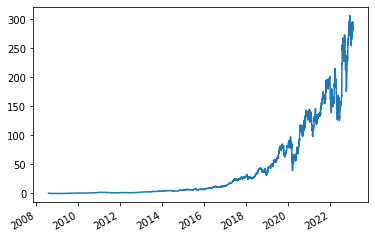

In [8]:
mvo_rets = (mvo_weights * hist_returns).sum(1) #  hist_returns.dot(mvo_weights) 
backtest.cumulative_returns(mvo_rets).plot()
print(backtest.performance_summary(mvo_rets))
mvo_rets.std()*252**.5

Use Uncon MVO

Target Vol: 
0.015139171159116354
Long-Short Ratio: 2.520505528333661
Leverage: 2.3153520080862995
Sum of Vol Weights: 1.0
Target Portfolio Sharpe Ratio: 55.16701027704348
Sharpe Ratio                   1.058696
Drift Adjusted Sharpe Ratio    0.193974
CAGR                           0.238009
Vol                            0.225812
Sortino Ratio                  1.495622
Martin (Ulcer) Ratio           0.001981
Omega Ratio                    1.145683
RR Ratio                       1.208831
Win Rate                       0.536753
Skew                           0.064310
Kurtosis                       9.099646
Max Drawdown                  -0.327863
VaR - Laplace                 -0.053445
CVaR - Laplace                -0.068909
dtype: float64


(0.22581169233301596,
 TXN     0.488624
 NEE     0.282749
 INTC   -0.485033
 AMT     0.055486
 ISRG    0.062930
 FISV    0.194383
 ED      0.222686
 DAL     0.101229
 MHK    -0.172643
 TDOC    0.090048
 ACLS    0.087823
 PLYM    0.071718
 dtype: float64)

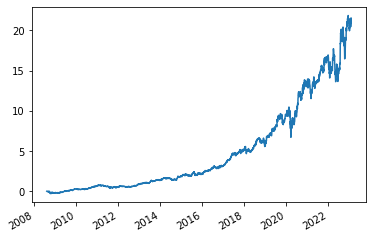

In [6]:
mvo_weights = backtest.unconstrained_mvo(hist_returns, hist_returns.mean()/hist_returns.std())

mvo_rets = (mvo_weights * hist_returns).sum(1) #  hist_returns.dot(mvo_weights) 
backtest.cumulative_returns(mvo_rets).plot()
print(backtest.performance_summary(mvo_rets))
mvo_rets.std()*252**.5, mvo_weights